### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [113]:
# Imports
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

import sklearn
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings  
warnings.filterwarnings('ignore')  

In [70]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [71]:
# Sense check and view metadata of the DataFrame.
print(reviews.shape)
print(reviews.info())

(2000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [72]:
# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [73]:
# Create a summary of the descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [74]:
# Drop unnecessary columns.
reviews_sub1 = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews_sub1.columns.values.tolist()

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [75]:
# Rename the column headers.
reviews_sub2 = reviews_sub1.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
reviews_sub2.columns.values.tolist()

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [76]:
# Create a CSV file as output.
reviews_sub2.to_csv('reviews_subset.csv', index=False)

In [77]:
# Import new CSV file with Pandas.
reviews_sub = pd.read_csv('reviews_subset.csv')

# View DataFrame.
reviews_sub.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [78]:
# Sense check and view metadata of the DataFrame.
reviews_sub.shape
reviews_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

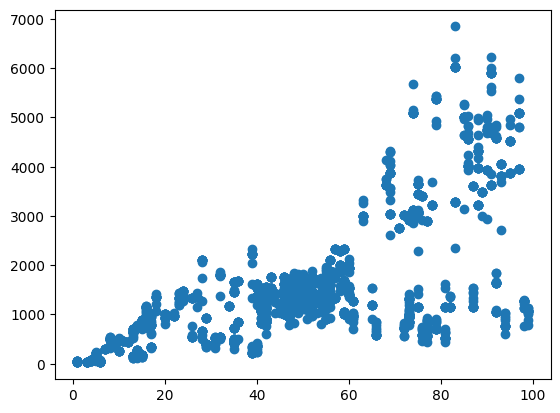

In [79]:
# Independent variable.
x = reviews_sub['spending_score']

# Dependent variable.
y = reviews_sub['loyalty_points']

# Check for linearity.
plt.scatter(x,y)

In [80]:
# OLS model and summary.
f = 'y ~ x'
spend_test = ols(f, data = reviews_sub).fit()

# View the output.
spend_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.92e-263
Time:                        23:16:09   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Extract the estimated parameters.
print("Parameters: ", spend_test.params)  

# Extract the standard errors.
print("Standard errors: ", spend_test.bse)    

# Extract the predicted values.
print("Predicted values: ", spend_test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [82]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 33.061693.
# Constant coef: -75.052663.
spend_y_pred = (-0.4618) + 33.061693* reviews_sub['spending_score']

# View the output.
spend_y_pred

0       1288.944227
1       2677.535333
2        197.908358
3       2545.288561
4       1322.005920
           ...     
1995    2280.795017
1996     264.031744
1997    3008.152263
1998     528.525288
1999     264.031744
Name: spending_score, Length: 2000, dtype: float64

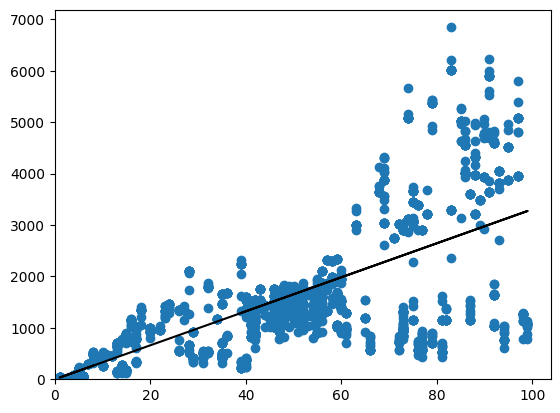

In [83]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, spend_y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

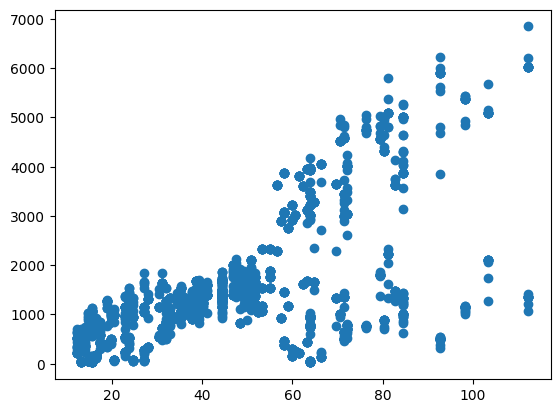

In [84]:
# Independent variable.
x = reviews_sub['remuneration']

# Dependent variable.
y = reviews_sub['loyalty_points']

# Check for linearity.
plt.scatter(x,y)

In [85]:
# OLS model and summary.
f = 'y ~ x'
remun_test = ols(f, data = reviews_sub).fit()

# View the output.
remun_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.43e-209
Time:                        23:16:10   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Extract the estimated parameters.
print("Parameters: ", remun_test.params)  

# Extract the standard errors.
print("Standard errors: ", remun_test.bse)    

# Extract the predicted values.
print("Predicted values: ", remun_test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [87]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 34.187825.
# Constant coef: -65.686513.
remun_y_pred = (-65.686513) + 34.187825* reviews_sub['remuneration']

# View the output.
remun_y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

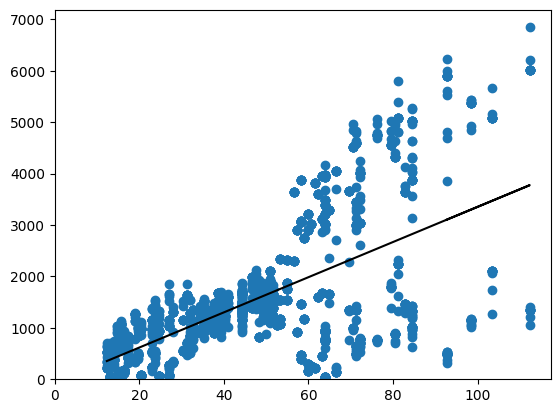

In [88]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, remun_y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

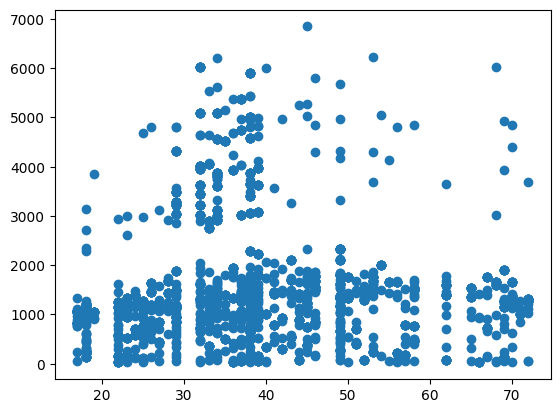

In [89]:
# Independent variable.
x = reviews_sub['age']

# Dependent variable.
y = reviews_sub['loyalty_points']

# Check for linearity.
plt.scatter(x,y)

In [90]:
# OLS model and summary.
f = 'y ~ x'
age_test = ols(f, data = reviews_sub).fit()

# View the output.
age_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 07 Jan 2023   Prob (F-statistic):             0.0577
Time:                        23:16:11   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Extract the estimated parameters.
print("Parameters: ", age_test.params)  

# Extract the standard errors.
print("Standard errors: ", age_test.bse)    

# Extract the predicted values.
print("Predicted values: ", age_test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [92]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 34.187825.
# Constant coef: -65.686513.
age_y_pred =  1736.517739 +  (-4.012805)* reviews_sub['age']

# View the output.
age_y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

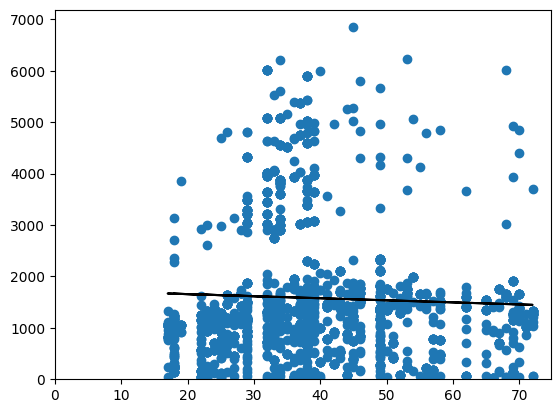

In [93]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, age_y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) spending & remuneration vs loyalty

In [94]:
# Perform a mutli-linear regression.
# Independent variable.
X = reviews_sub[['spending_score', 'remuneration']] 

# Dependent variable.
y = reviews_sub['loyalty_points']

In [95]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [96]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [97]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8269134701989259
Intercept:  -1700.3050970144366
Coefficients:


[('spending_score', 32.89269468782095), ('remuneration', 33.97949882180286)]

In [100]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:16:58   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3237     39.588    -42.

In [110]:
# Run regression on the train subset.
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [126]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1630.49111009  512.07788432 2146.32624449 ... 1422.83416662 1259.61480693
 1441.17214231]


In [127]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

81.44236432529975


In [137]:
# Add a constant.
x_temp = sm.add_constant(x_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values,i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        8.91           const
1        1.00  spending_score
2        1.00    remuneration


In [136]:
# Evaluate the model.
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 429.6636201690913
Mean Square Error (Final): 300944.09178342693


## 6. Observations and insights

***Your observations here...***
- Spending and Remuneration have correlation with Loyalty, whereas Age does not.
- Spending and Remuneration have multi-linear relationship with Loyalty, such relationship accounts for 83% of the Loyalty variability.
- There is no collinearity between Spending and Remuneration, and the two variables have very similar influence on the Loyalty variability.
- There are more outliers, i.e. the models are less reliable in the high-spending and high-remuneration regions.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [147]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [148]:
# Load the CSV file(s) as df2.
df2=pd.read_csv('reviews_subset.csv')

# View DataFrame.
df2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [152]:
# Drop unnecessary columns.
df3 = df2.drop(['review', 'summary','product','education','gender','age'], axis=1)

# View DataFrame.
df3

remuneration  spending_score  loyalty_points
0            12.30              39             210
1            12.30              81             524
2            13.12               6              40
3            13.12              77             562
4            13.94              40             366
...            ...             ...             ...
1995         84.46              69            4031
1996         92.66               8             539
1997         92.66              91            5614
1998         98.40              16            1048
1999         92.66               8             479

[2000 rows x 3 columns]

In [153]:
# Explore the data.
print(df3.shape)
print(df3.info())

(2000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   loyalty_points  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB
None


In [154]:
# Descriptive statistics.
df3.describe()

remuneration  spending_score  loyalty_points
count   2000.000000     2000.000000     2000.000000
mean      48.079060       50.000000     1578.032000
std       23.123984       26.094702     1283.239705
min       12.300000        1.000000       25.000000
25%       30.340000       32.000000      772.000000
50%       47.150000       50.000000     1276.000000
75%       63.960000       73.000000     1751.250000
max      112.340000       99.000000     6847.000000

## 2. Plot

<AxesSubplot: xlabel='spending_score', ylabel='remuneration'>

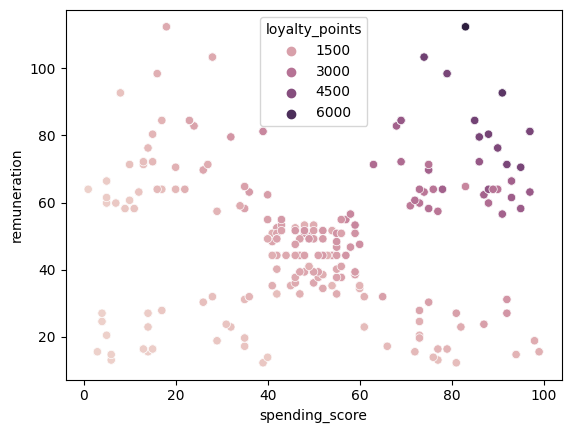

In [155]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='remuneration',
                hue='loyalty_points',
                data=df3)

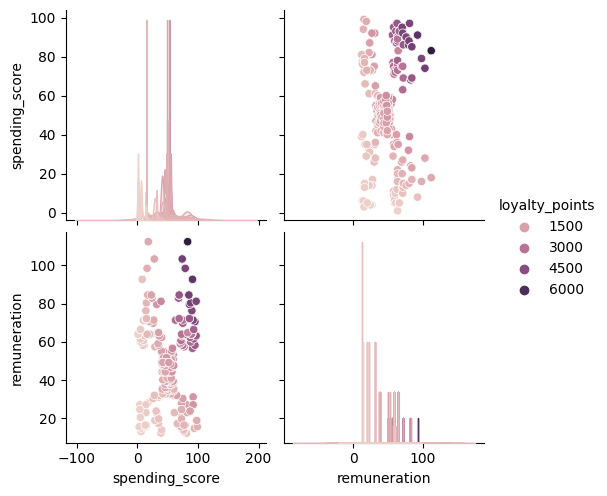

In [156]:
# Create a pairplot with Seaborn.
x = df3[['spending_score', 'remuneration']]

sns.pairplot(df3,
             vars=x,
             hue='loyalty_points',
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

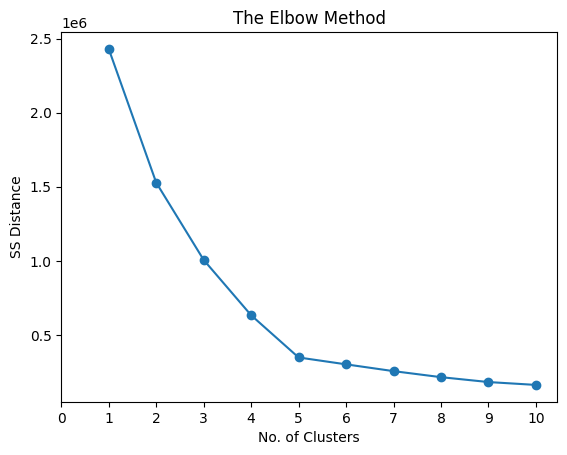

In [157]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("SS Distance")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

plt.show()

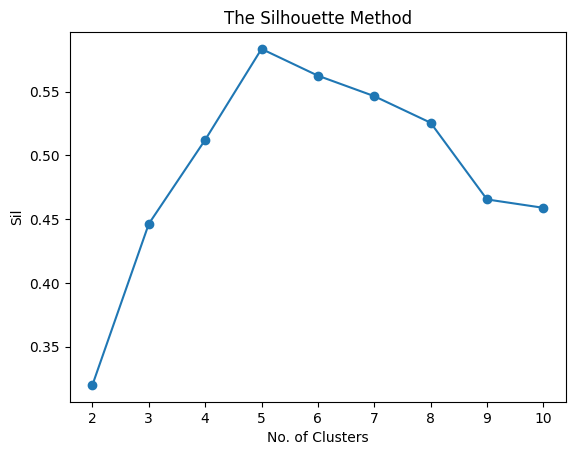

In [158]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

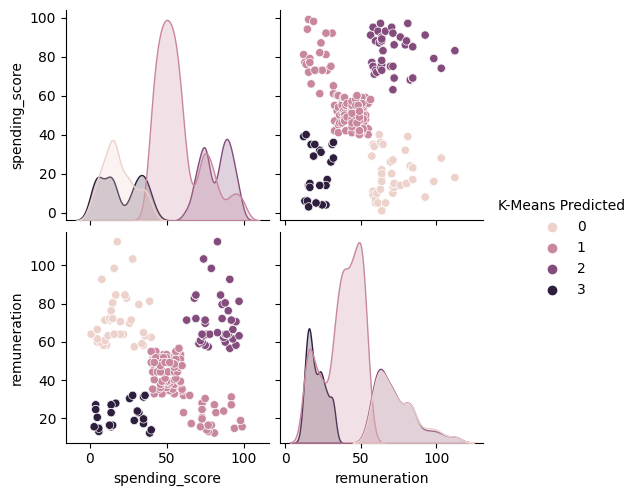

In [159]:
# Use 4 clusters.
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [160]:
# Use 4 clusters.
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

In [161]:
# Use 4 clusters.
# View the K-Means predicted.
print(x.head())

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  1
2               6         13.12                  3
3              77         13.12                  1
4              40         13.94                  3


<AxesSubplot: xlabel='spending_score', ylabel='remuneration'>

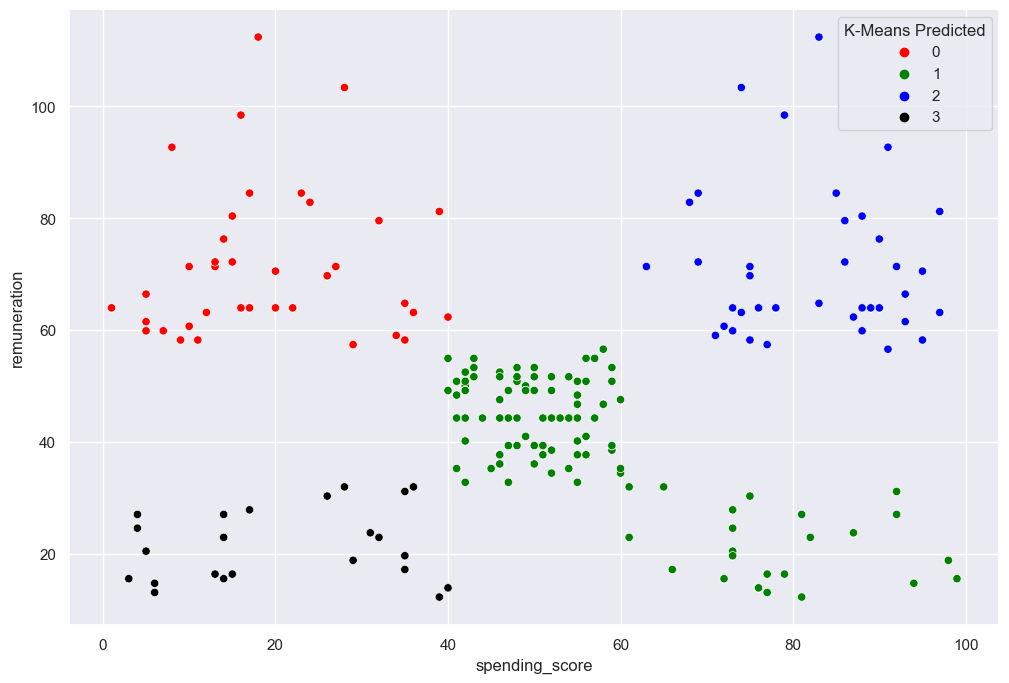

In [162]:
# Use 4 clusters.
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

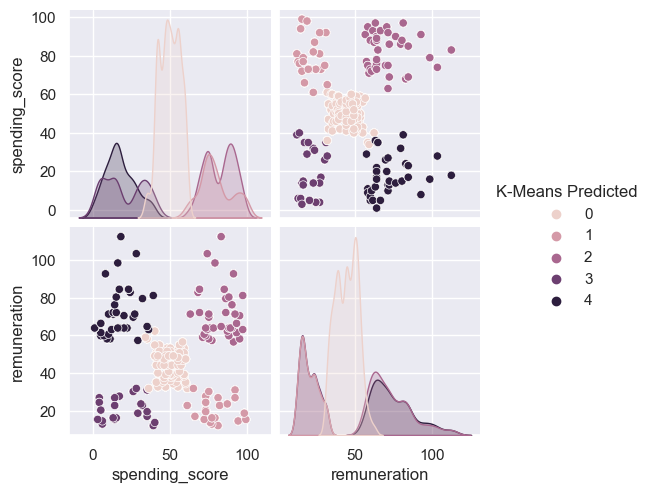

In [163]:
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [164]:
# Use 5 clusters.
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [165]:
# Use 5 clusters.
# View the K-Means predicted.
print(x.head())

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  1
2               6         13.12                  3
3              77         13.12                  1
4              40         13.94                  3


<AxesSubplot: xlabel='spending_score', ylabel='remuneration'>

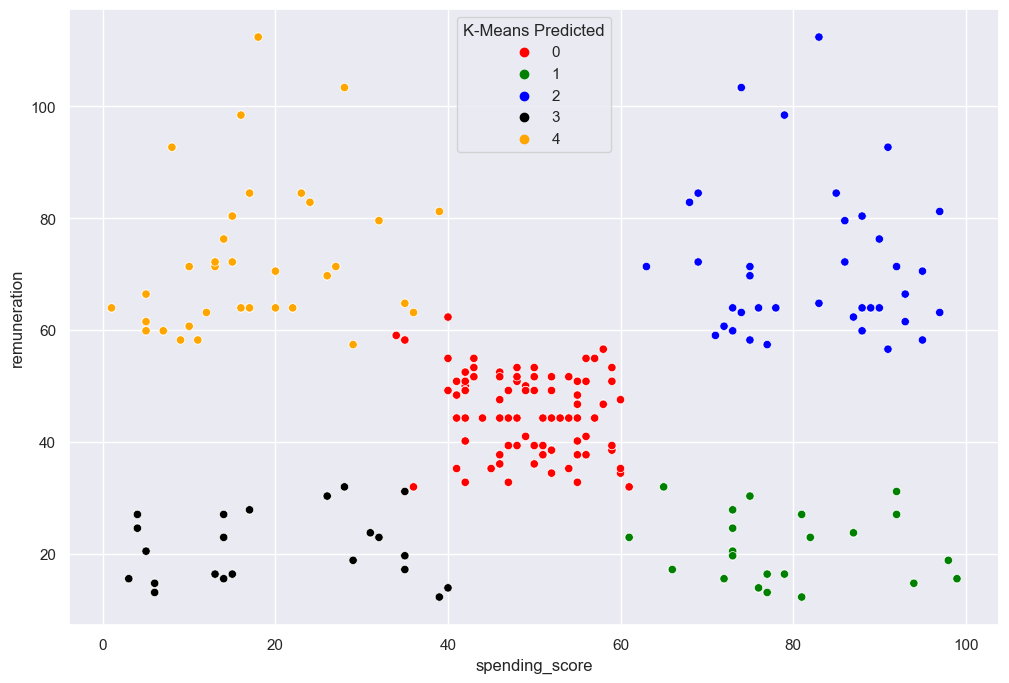

In [166]:
# Use 5 clusters.
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

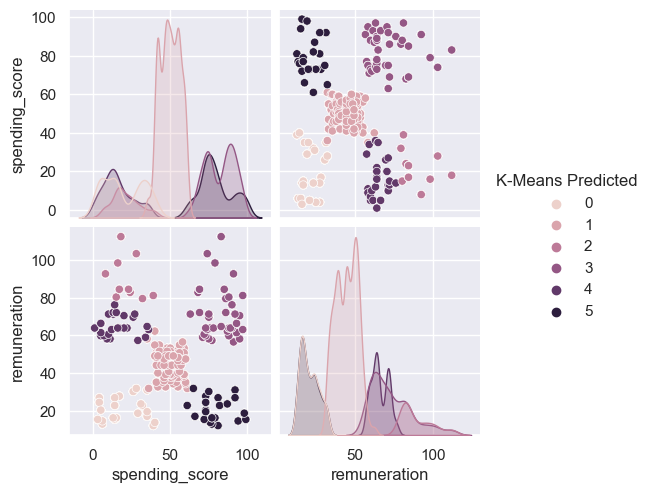

In [167]:
# Use 6 clusters.
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [168]:
# Use 6 clusters.
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
3    356
0    271
5    269
4    214
2    123
Name: K-Means Predicted, dtype: int64

In [345]:
# Use 6 clusters.
# View the K-Means predicted.
print(x.head())

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  0
1              81         12.30                  5
2               6         13.12                  0
3              77         13.12                  5
4              40         13.94                  0


<AxesSubplot: xlabel='spending_score', ylabel='remuneration'>

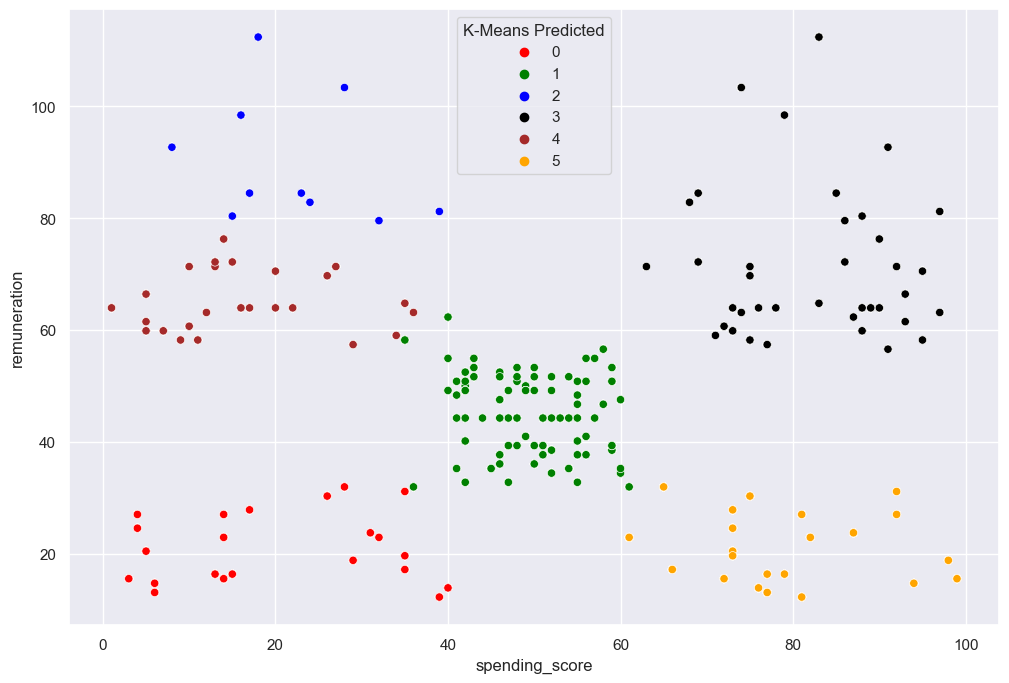

In [346]:
# Use 6 clusters.
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'brown', 'orange'])

## 5. Fit final model and justify your choice

In [435]:
# Apply the final model.
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

In [437]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  1
2               6         13.12                  3
3              77         13.12                  1
4              40         13.94                  3


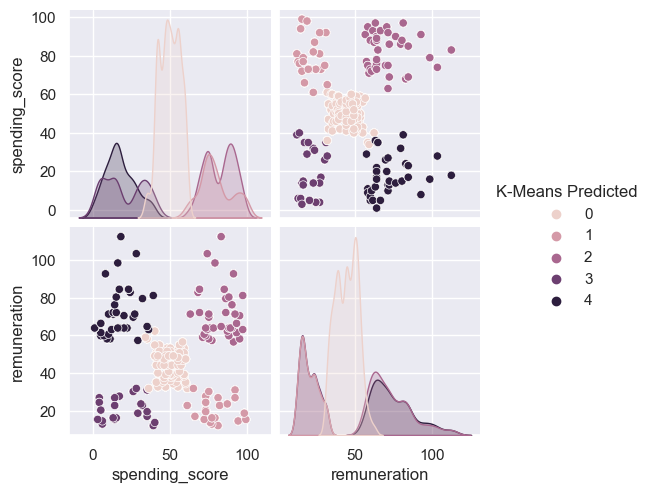

In [438]:
# Visualising the clusters.
# Use 5 clusters.
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# View the DataFrame.
print(x.head())

<AxesSubplot: xlabel='spending_score', ylabel='remuneration'>

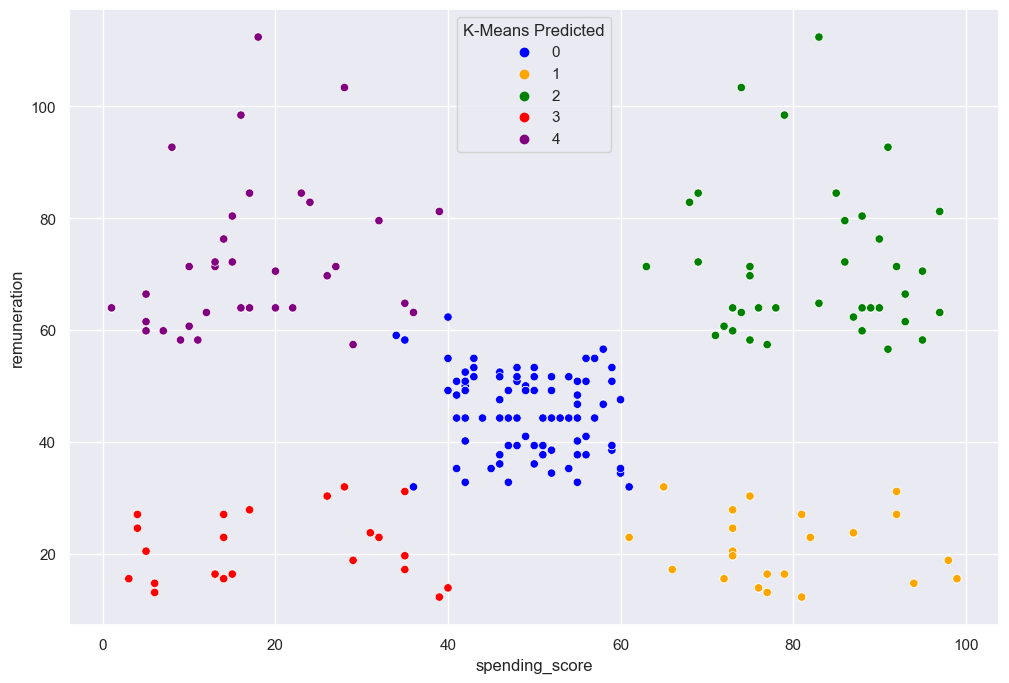

In [450]:
# Create a scatterplot.
sns.set(rc = {'figure.figsize':(12, 8)})
sns.scatterplot(x='spending_score' , 
                y='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['blue', 'orange', 'green', 'red', 'purple'])

In [444]:
# Add Loyalty Points column to DataFrame.
x_new=x
x_new['loyalty_points']=df3['loyalty_points']
x_new.head()

spending_score  remuneration  K-Means Predicted  loyalty_points
0              39         12.30                  3             210
1              81         12.30                  1             524
2               6         13.12                  3              40
3              77         13.12                  1             562
4              40         13.94                  3             366

Text(0, 0.5, 'Loyalty Points')

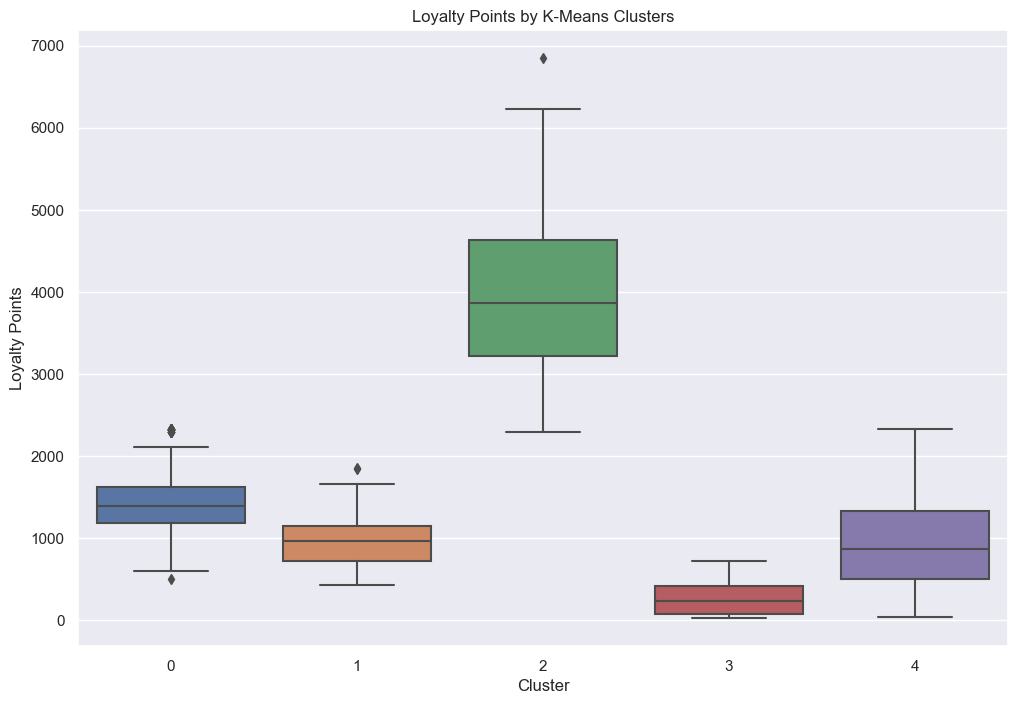

In [449]:
# Create a boxplot to reflect Loyatly Points distribution by K-Means Clusters.
order1 = x_new.groupby(by=['K-Means Predicted'])['loyalty_points'].median().index
sns.boxplot(data=x_new, x='K-Means Predicted', y='loyalty_points', order=order1)

plt.title("Loyalty Points by K-Means Clusters")
plt.xlabel("Cluster")
plt.ylabel("Loyalty Points")

## 7. Discuss: Insights and observations

***Your observations here...***
- As supported by the Elbow Method and Silhouette Method, it is the most preferred approach to divide the customer database into 5 clusters.
- Cluster #0 is the largest cluster of all, followed by Cluster #2; Cluster #2 has the highest mean value of loyalty points, followed by Cluster #0.
- Engaging both Cluster #0 and #2 will drive loyalty engagements of majority of the customers.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [169]:
# Install nltk, wordcloud and textblob.
!pip install nltk
!pip install wordcloud
!pip install textblob

# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os


# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [170]:
# Load the data set as df3.
df3=pd.read_csv('reviews_subset.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [171]:
# Explore data set.
print(df3.shape)
print(df3.info())

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [172]:
# Keep necessary columns. Drop unnecessary columns.
nlp_df = df3[['review','summary']]

# View DataFrame.
nlp_df

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [173]:
# Determine if there are any missing values.
nlp_df.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [174]:
# Review: Change all to lower case and join with a space.
nlp_df['review'] = nlp_df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
nlp_df['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [175]:
# Summary: Change all to lower case and join with a space.
nlp_df['summary'] = nlp_df['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
nlp_df['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [176]:
# Replace all the punctuations in review column.
nlp_df['review'] = nlp_df['review'].str.replace('[^\w\s]','')

# View output.
nlp_df['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [177]:
# Replace all the punctuations in review column.
nlp_df['summary'] = nlp_df['summary'].str.replace('[^\w\s]','')

# View output.
nlp_df['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [178]:
# Check no. of duplicated values in both columns.
print(nlp_df.review.duplicated().sum())
print(nlp_df.summary.duplicated().sum())

50
649


In [179]:
# Drop duplicates in both columns.
nlp_data = nlp_df.drop_duplicates(subset=['review','summary'])

# View DataFrame.
nlp_data.reset_index(inplace = True)
nlp_data=nlp_data[['review','summary']]
nlp_data

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1956  the perfect word game for mixed ages with mom ...   
1957  great game did not think i would like it when ...   
1958           great game for all keeps the mind nimble   
1959                                           fun game   
1960  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 2 columns]

In [267]:
# Sense check the DataFrame.
print(nlp_data.shape)
print(nlp_data.info())

(1961, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB
None


## 3. Tokenise and create wordclouds

In [268]:
# Create new DataFrame (copy DataFrame).
nlp_sub = nlp_data.copy()

# View DataFrame.
nlp_sub.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [269]:
# Apply tokenisation to both columns.
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Reivew: Tokenise the words.
nlp_sub['review_str'] = nlp_sub['review'].values.astype('str')
nlp_sub['review_tk'] = nlp_sub['review_str'].apply(word_tokenize)
nlp_sub['review_token'] = [' '.join(map(str, l)) for l in nlp_sub['review_tk']]
# Summary: Tokenise the words.
nlp_sub['summary_str'] = nlp_sub['summary'].values.astype('str')
nlp_sub['summary_tk']= nlp_sub['summary_str'].apply(word_tokenize)
nlp_sub['summary_token'] = [' '.join(map(str, l)) for l in nlp_sub['summary_tk']]
# View DataFrame.
nlp_token = nlp_sub[['review_token','summary_token']]
nlp_token

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


review_token  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1956  the perfect word game for mixed ages with mom ...   
1957  great game did not think i would like it when ...   
1958           great game for all keeps the mind nimble   
1959                                           fun game   
1960  this game is fun a lot like scrabble without a...   

                                          summary_token  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 2 columns]

In [270]:
# Review: Create an empty string variable.
all_review = ''
for i in range(nlp_sub['review_token'].shape[0]):
    # Add each comment.
    all_review = all_review + nlp_sub['review_token'][i]

In [271]:
# Review: Create a word cloud.
# Create a WordCloud object.
review_word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

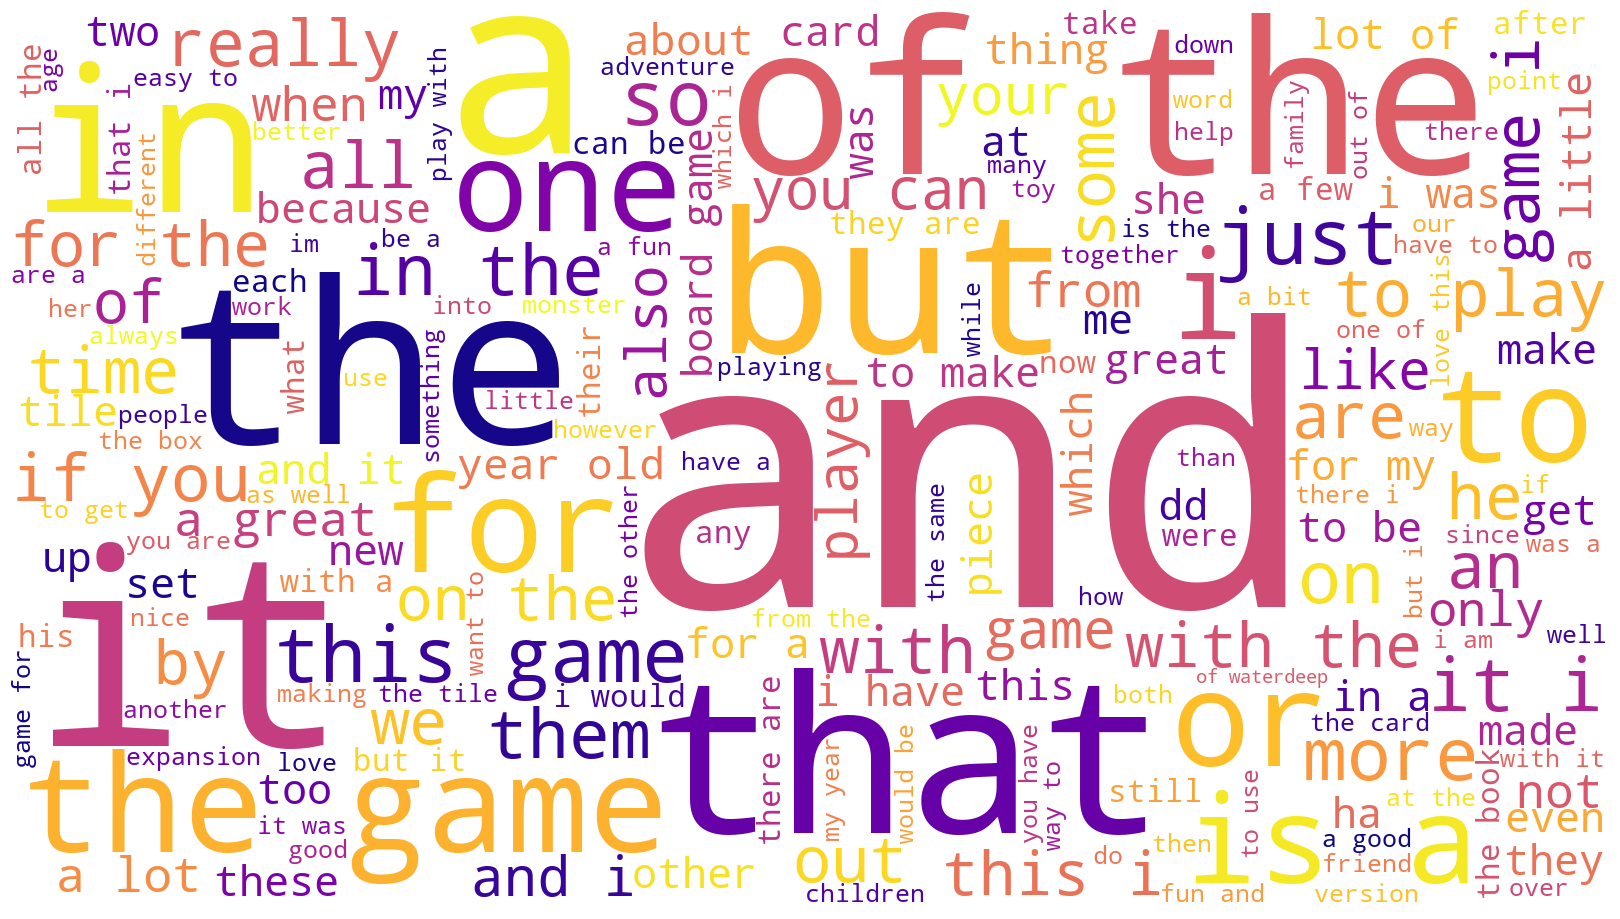

In [272]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [273]:
# Summary: Create an empty string variable.
all_summary = ''
for i in range(nlp_sub['summary_token'].shape[0]):
    # Add each comment.
    all_summary = all_summary + nlp_sub['summary_token'][i]

In [274]:
# Summary: Create a word cloud.
# Create a WordCloud object.
summary_word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

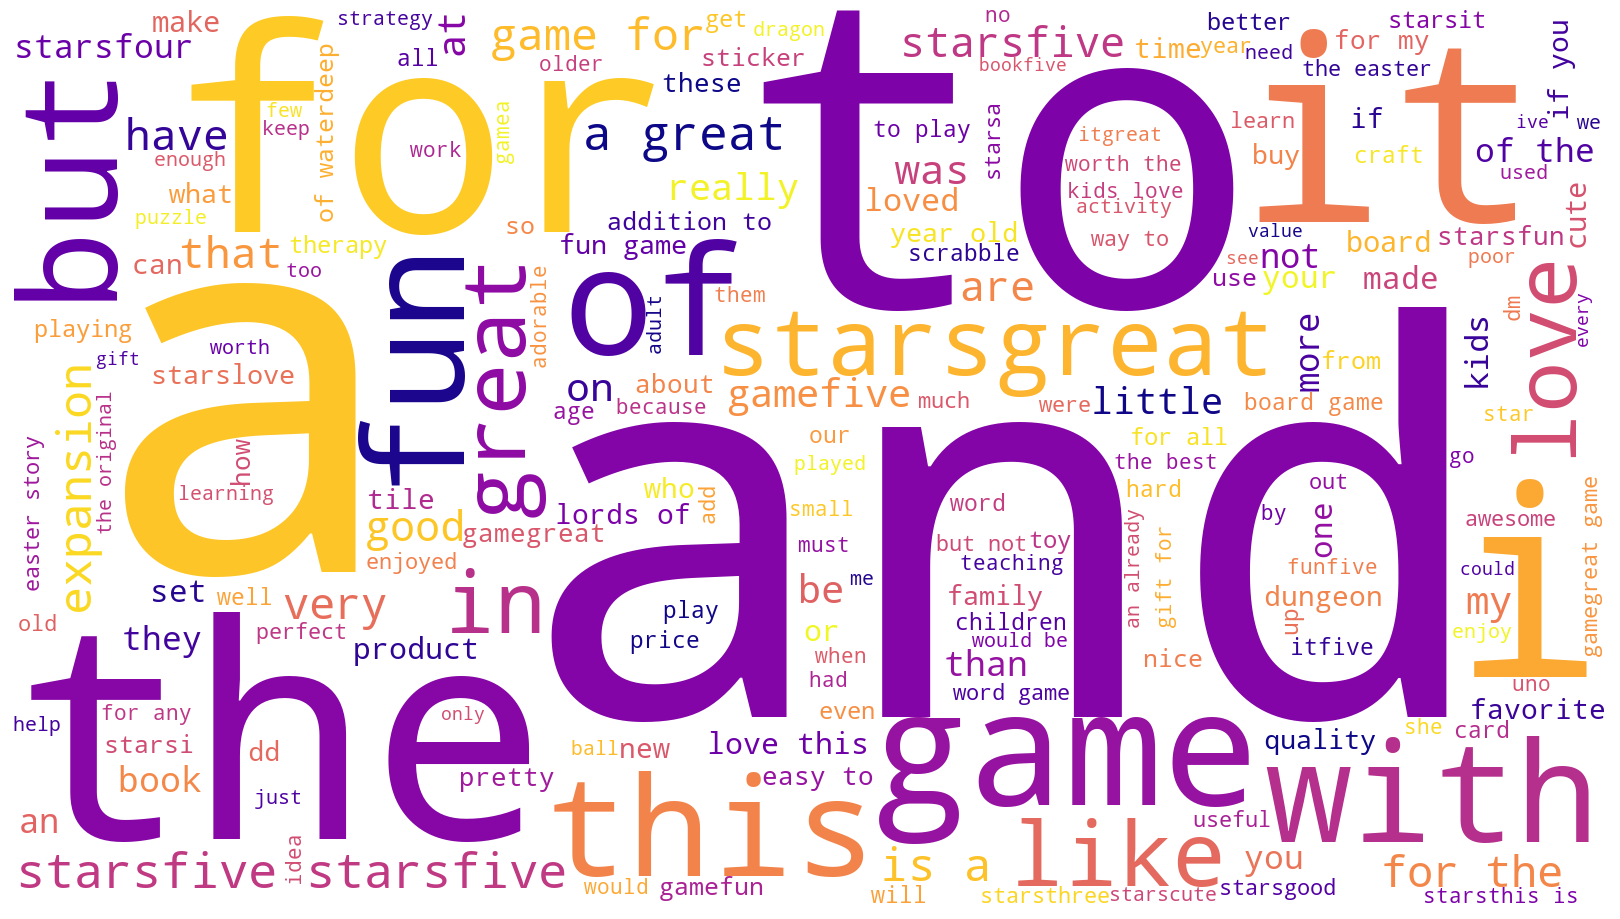

In [275]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [276]:
# Review: Create an empty string variable.
all_review = []
for i in range(nlp_sub['review'].shape[0]):
    # Add each comment.
    all_review = all_review + nlp_sub['review_tk'][i]
    
# Review: Calculate the frequency distribution.
review_fdist = FreqDist(all_review)
# Preview data.
review_fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [277]:
# Summary: Create an empty string variable.
all_summary = []
for i in range(nlp_sub['summary'].shape[0]):
    # Add each comment.
    all_summary = all_summary + nlp_sub['summary_tk'][i]
    
# Summary: Calculate the frequency distribution.
summary_fdist = FreqDist(all_summary)
# Preview data.
summary_fdist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [278]:
# Reivew: Delete all the alpanum.
review_token = [word for word in all_review if word.isalnum()]

In [279]:
# Summary: Delete all the alpanum.
summary_token = [word for word in all_summary if word.isalnum()]

In [280]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

In [281]:
# Review: Create a filtered list of tokens without stop words.
review_token2 = [x for x in review_token if x.lower() not in english_stopwords]

# Define an empty string variable.
review_token2_str = ''

for value in review_token2:
    # Add each filtered token word to the string.
    review_token2_str = review_token2_str + value + ' '

In [282]:
# Summary: Create a filtered list of tokens without stop words.
summary_token2 = [x for x in summary_token if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_token2_str = ''

for value in summary_token2:
    # Add each filtered token word to the string.
    summary_token2_str = summary_token2_str + value + ' '

### 4c) Create wordcloud without stopwords

In [283]:
# Review: Create a wordcloud without stop words.
# Create a WordCloud object.
review_word_cloud_new = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_token2_str) 

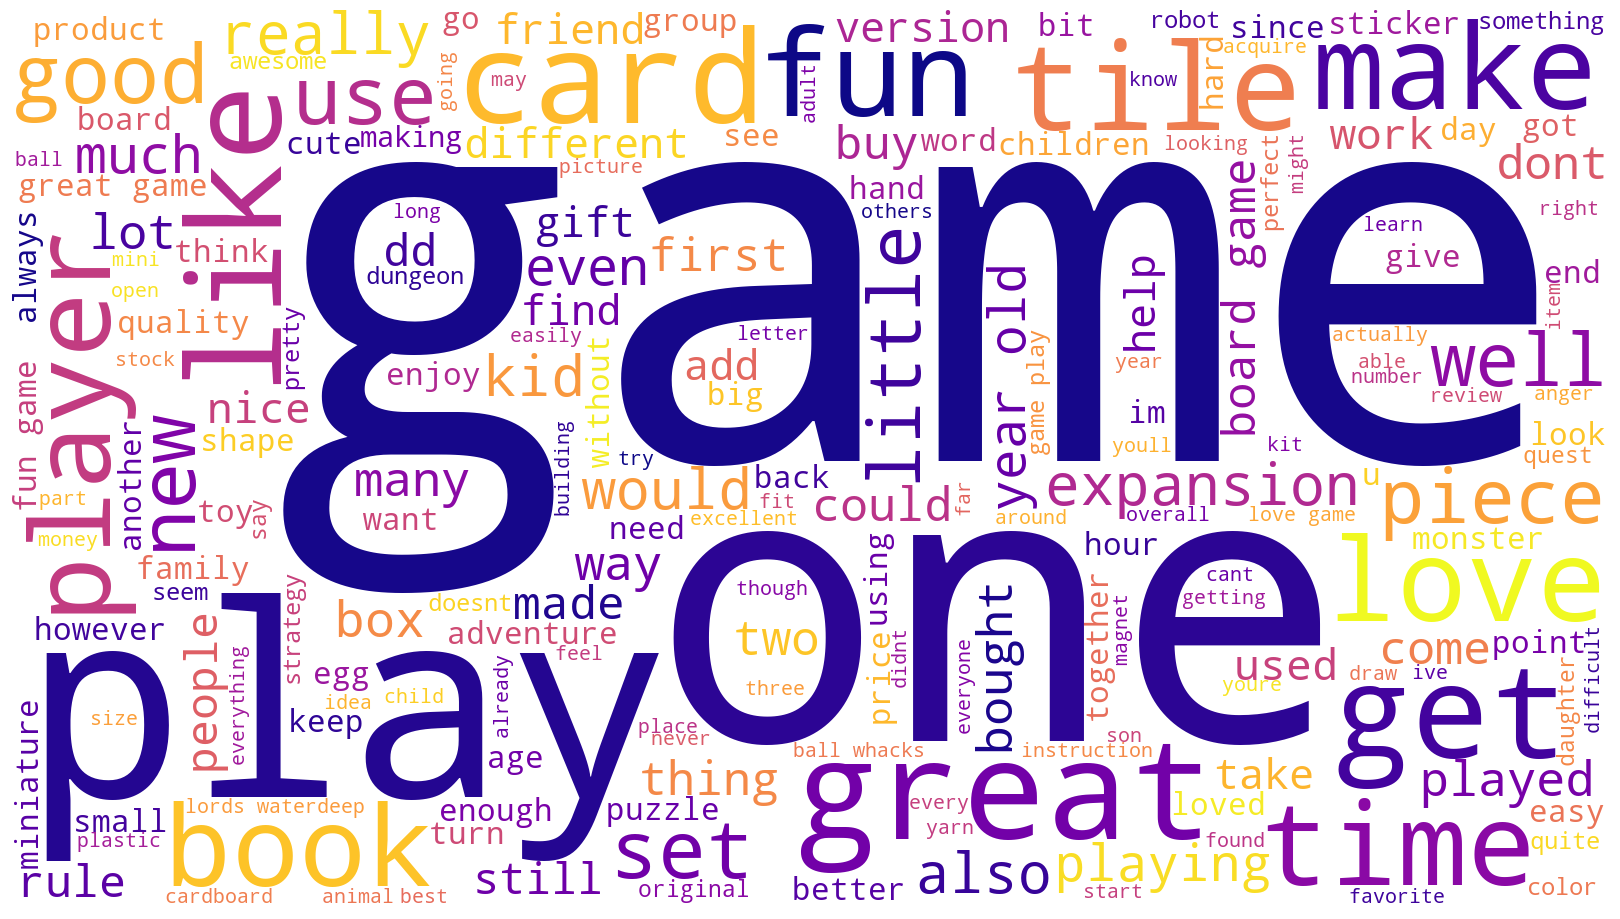

In [284]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud_new) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [285]:
# Summary: Create a wordcloud without stop words.
# Create a WordCloud object.
summary_word_cloud_new = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_token2_str) 

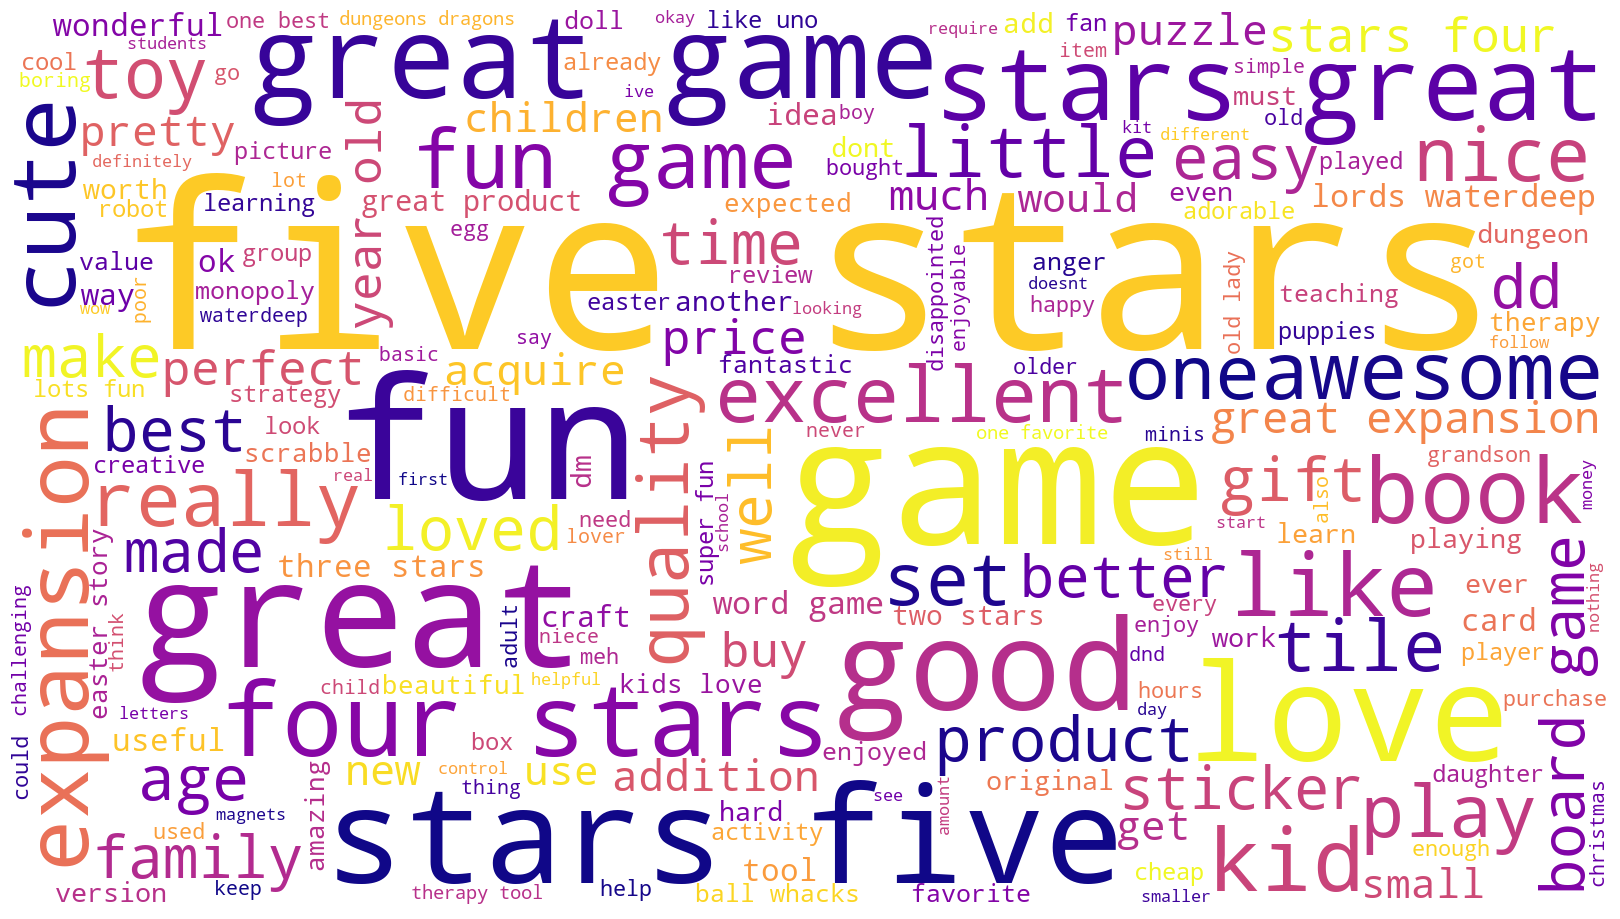

In [286]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_word_cloud_new) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [287]:
# Reivew: Determine the 15 most common words.
review_fdist2 = FreqDist(review_token2)
review_fdist2

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [288]:
# Review: Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review_token2).most_common(15), columns=['Word', 'Frequency']).set_index('Word')
review_counts

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

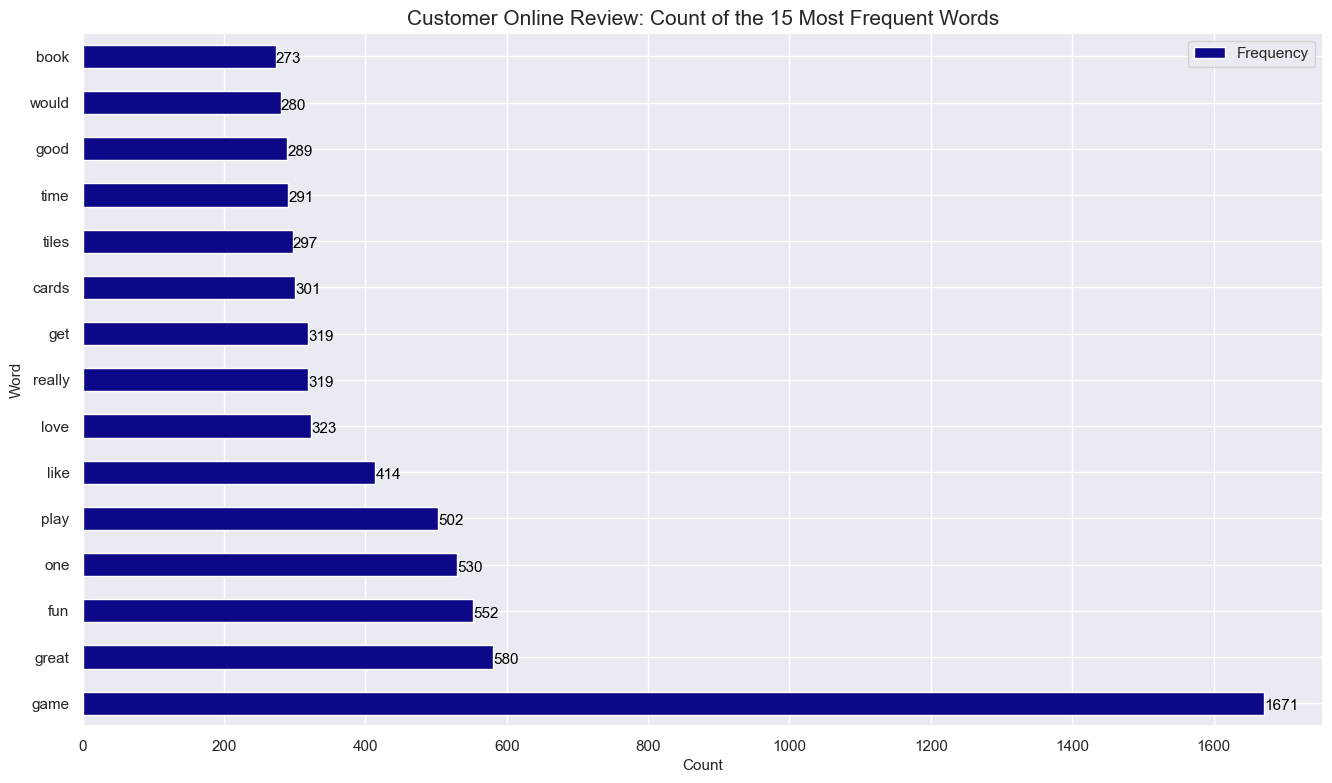

In [289]:
# Review: Create barplot.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=11, colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=11)
ax.set_ylabel('Word', fontsize=11)
ax.set_title("Customer Online Review: Count of the 15 Most Frequent Words", fontsize=15)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=11, color='black')

In [290]:
# Import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [291]:
# Review: Change the top 15 words DataFrame to list.
review_counts_list = review_counts.reset_index(inplace=False)['Word'].tolist()

# Review: Run the polarity score function.
review_token_polarity = {"".join(_) : sia.polarity_scores("".join(_)) for _ in review_counts_list}
review_token_polarity

{'game': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'great': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 'fun': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106},
 'one': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'play': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.34},
 'like': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612},
 'love': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369},
 'really': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'get': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'cards': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'tiles': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'time': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'good': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 'would': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'book': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}

In [292]:
# Review: Convert results to DataFrame and sort to get top 15 positive words.
review_polarity = pd.DataFrame(review_token_polarity).T
review_polarity.sort_values('pos', ascending=0)

neg  neu  pos  compound
great   0.0  0.0  1.0    0.6249
fun     0.0  0.0  1.0    0.5106
play    0.0  0.0  1.0    0.3400
like    0.0  0.0  1.0    0.3612
love    0.0  0.0  1.0    0.6369
good    0.0  0.0  1.0    0.4404
game    0.0  1.0  0.0    0.0000
one     0.0  1.0  0.0    0.0000
really  0.0  1.0  0.0    0.0000
get     0.0  1.0  0.0    0.0000
cards   0.0  1.0  0.0    0.0000
tiles   0.0  1.0  0.0    0.0000
time    0.0  1.0  0.0    0.0000
would   0.0  1.0  0.0    0.0000
book    0.0  1.0  0.0    0.0000

In [293]:
# Review: Check distribution and moments of the compound.
review_polarity['compound'].describe()

count    15.000000
mean      0.194267
std       0.257845
min       0.000000
25%       0.000000
50%       0.000000
75%       0.400800
max       0.636900
Name: compound, dtype: float64

In [294]:
# Summary: Determine the 15 most common words.
summary_fdist2 = FreqDist(summary_token2)
summary_fdist2

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [295]:
# Summary: Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(summary_token2).most_common(15), columns=['Word', 'Frequency']).set_index('Word')
summary_counts

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

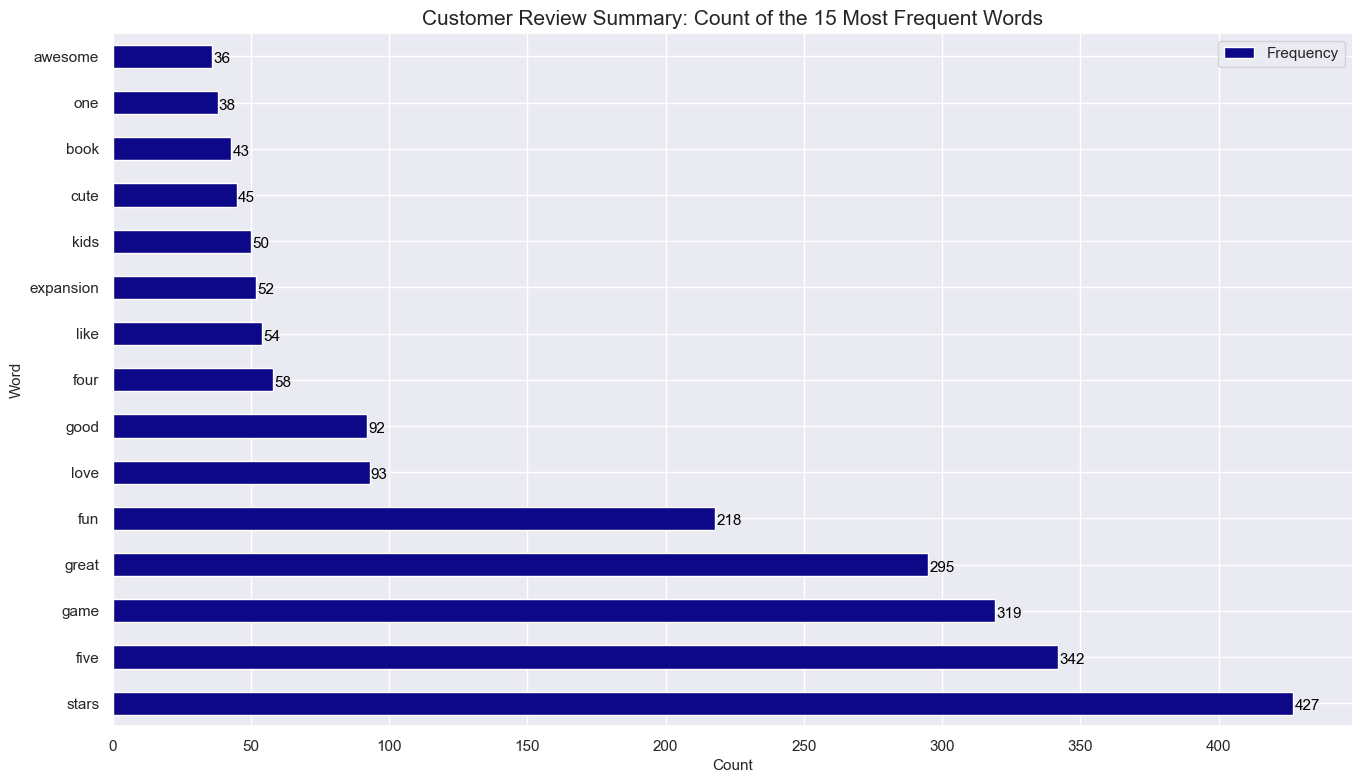

In [296]:
# Summary: Create barplot.
ax = summary_counts.plot(kind='barh', figsize=(16, 9), fontsize=11, colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=11)
ax.set_ylabel('Word', fontsize=11)
ax.set_title("Customer Review Summary: Count of the 15 Most Frequent Words", fontsize=15)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=11, color='black')

In [297]:
# Summary: Change the top 15 words DataFrame to list.
summary_counts_list = summary_counts.reset_index(inplace=False)['Word'].tolist()

# Summary: Run the polarity score function.
summary_token_polarity = {"".join(_) : sia.polarity_scores("".join(_)) for _ in summary_counts_list}
summary_token_polarity

{'stars': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'five': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'game': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'great': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 'fun': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106},
 'love': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369},
 'good': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 'four': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'like': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612},
 'expansion': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'kids': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'cute': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588},
 'book': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'one': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'awesome': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}}

In [298]:
# Summary: Convert results to DataFrame.
summary_polarity = pd.DataFrame(summary_token_polarity).T
summary_polarity.sort_values('pos', ascending=0)

neg  neu  pos  compound
great      0.0  0.0  1.0    0.6249
fun        0.0  0.0  1.0    0.5106
love       0.0  0.0  1.0    0.6369
good       0.0  0.0  1.0    0.4404
like       0.0  0.0  1.0    0.3612
cute       0.0  0.0  1.0    0.4588
awesome    0.0  0.0  1.0    0.6249
stars      0.0  1.0  0.0    0.0000
five       0.0  1.0  0.0    0.0000
game       0.0  1.0  0.0    0.0000
four       0.0  1.0  0.0    0.0000
expansion  0.0  1.0  0.0    0.0000
kids       0.0  1.0  0.0    0.0000
book       0.0  1.0  0.0    0.0000
one        0.0  1.0  0.0    0.0000

In [299]:
# Summary: Check distribution and moments of the compound.
summary_polarity['compound'].describe()

count    15.000000
mean      0.243847
std       0.279074
min       0.000000
25%       0.000000
50%       0.000000
75%       0.484700
max       0.636900
Name: compound, dtype: float64

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [300]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [301]:
# Review: Populate a new column with polarity scores for each comment.
nlp_sub['review_polarity'] = nlp_sub['review_token'].apply(generate_polarity)

# View output.
nlp_sub['review_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [302]:
# Review: Populate a new column with polarity scores for each comment.
nlp_sub['summary_polarity'] = nlp_sub['summary_token'].apply(generate_polarity)

# View output.
nlp_sub['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

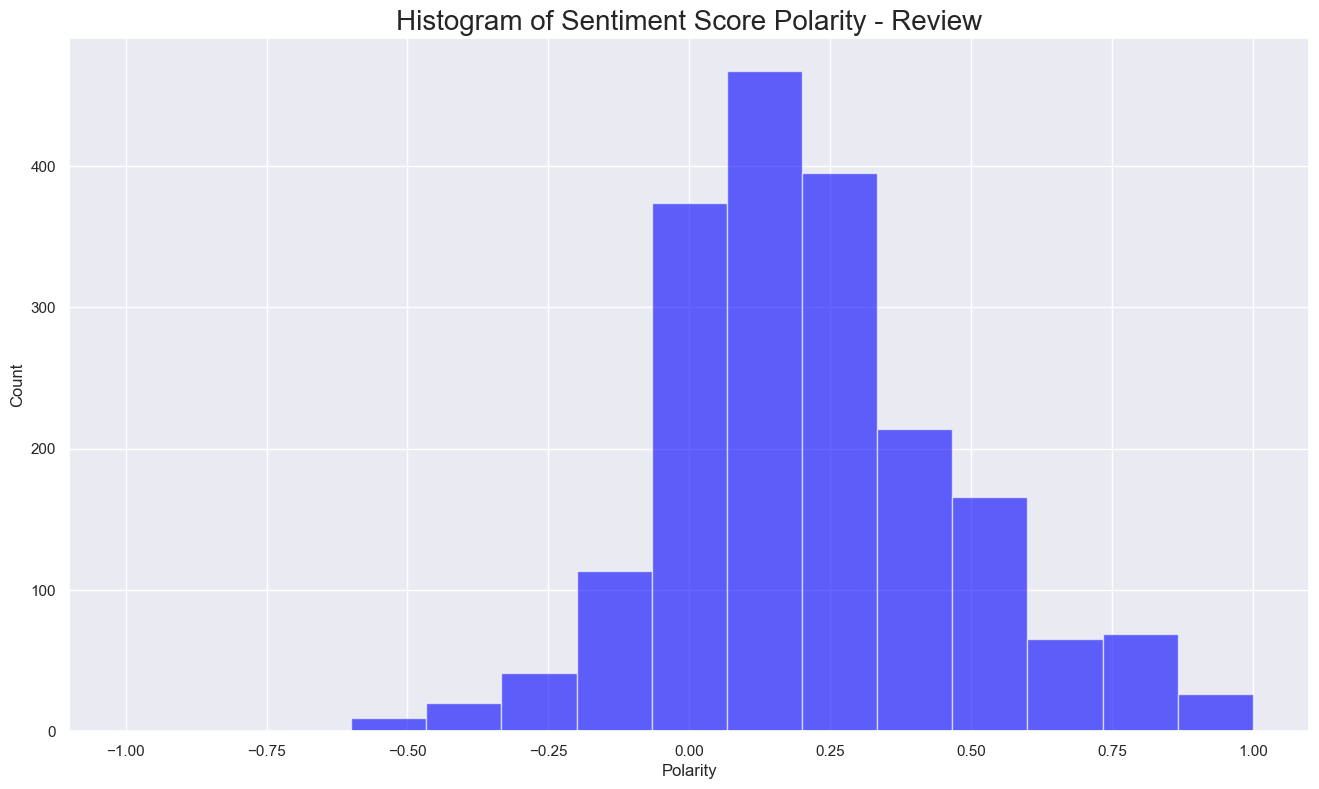

In [303]:
# Review: Create a histogram plot with bins = 15.
plt.figure(figsize=(16,9))

#Define bin and bar.
num_bins = 15
n, bins, patches = plt.hist(nlp_sub['review_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Sentiment Score Polarity - Review', fontsize=20)

plt.show()

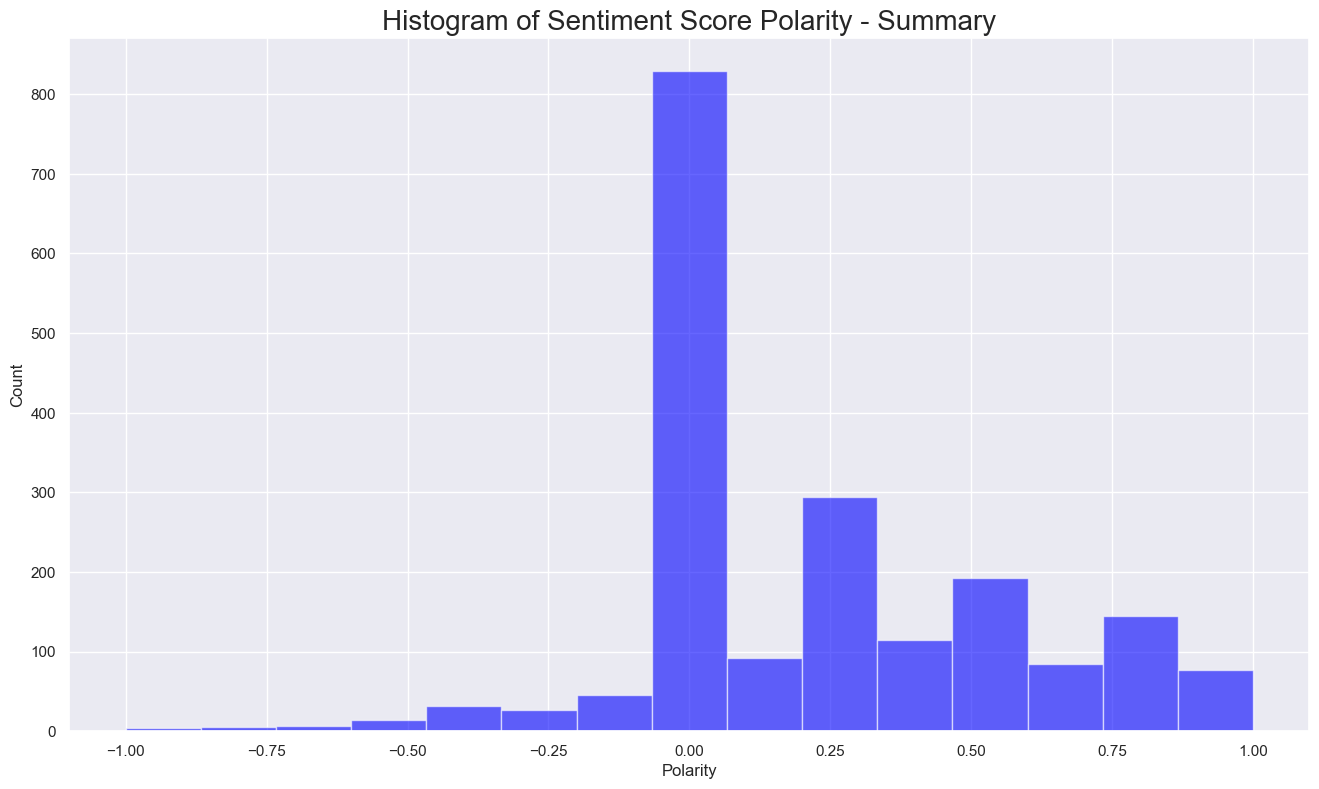

In [304]:
# Summary: Create a histogram plot with bins = 15.
plt.figure(figsize=(16,9))

#Define bin and bar.
num_bins = 15
n, bins, patches = plt.hist(nlp_sub['summary_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Sentiment Score Polarity - Summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [305]:
# Top 20 negative reviews.
neg_review = nlp_sub.nsmallest(20,'review_polarity')
neg_review = neg_review[['review','review_polarity']]

# View output.
neg_review

review  review_polarity
207   booo unles you are patient know how to measure...        -1.000000
181                   incomplete kit very disappointing        -0.780000
1773  im sorry i just find this product to be boring...        -0.583333
362   one of my staff will be using this game soon s...        -0.550000
116   i bought this as a christmas gift for my grand...        -0.500000
226   this was a gift for my daughter i found it dif...        -0.500000
229                    i found the directions difficult        -0.500000
289              instructions are complicated to follow        -0.500000
300                                           difficult        -0.500000
1501                         expensive for what you get        -0.500000
173   i sent this product to my granddaughter the po...        -0.491667
345   my 8 yearold granddaughter and i were very fru...        -0.446250
531   i purchased this on the recommendation of two ...        -0.440741
305                 very hard complicated to make these        -0.439583
421                     kids i work with like this game        -0.400000
430   this game although it appears to be like uno a...        -0.400000
490   my son loves playing this game it was recommen...        -0.400000
795                                this game is a blast        -0.400000
798         i bought this for my son he loves this game        -0.400000
814             was a gift for my son he loves the game        -0.400000

In [306]:
# Top 20 negative summaries.
neg_summary = nlp_sub.nsmallest(20,'summary_polarity')
neg_summary = neg_summary[['summary','summary_polarity']]

# View output.
neg_summary

summary  summary_polarity
21                        the worst value ive ever seen         -1.000000
207    boring unless you are a craft person which i am          -1.000000
819                                              boring         -1.000000
1148  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
143                                        disappointed         -0.750000
623                                        disappointed         -0.750000
785                                        disappointed         -0.750000
1591                                       disappointed         -0.750000
361   promotes anger instead of teaching calming met...         -0.700000
875            too bad this is not what i was expecting         -0.700000
880                        bad qualityall made of paper         -0.700000
177     at age 31 i found these very difficult to make          -0.650000
100                                    small and boring         -0.625000
511                                          mad dragon         -0.625000
797                                       disappointing         -0.600000
1001                                      disappointing         -0.600000
1099                                      disappointing         -0.600000
1773                                      disappointing         -0.600000
991   then you will find this board game to be dumb ...         -0.591667

In [307]:
# Top 20 positive reviews.
pos_review = nlp_sub.nlargest(20,'review_polarity')
pos_review = pos_review[['review','review_polarity']]

# View output.
pos_review

review  review_polarity
7                             came in perfect condition              1.0
164                                        awesome book              1.0
193                                        awesome gift              1.0
489   excellent activity for teaching selfmanagement...              1.0
517                         perfect just what i ordered              1.0
583                                   wonderful product              1.0
601                                  delightful product              1.0
613   wonderful for my grandson to learn the resurre...              1.0
782                                             perfect              1.0
923                                             awesome              1.0
1119                                        awesome set              1.0
1150               best set buy 2 if you have the means              1.0
1159               awesome addition to my rpg gm system              1.0
1282                                        its awesome              1.0
1380  one of the best board games i played in along ...              1.0
1523  my daughter loves her stickers awesome seller ...              1.0
1580  this was perfect to go with the 7 bean bags  i...              1.0
1684                                        awesome toy              1.0
1689  it is the best thing to play with and also min...              1.0
1695                  excellent toy to simulate thought              1.0

In [308]:
# Top 20 positive summaries.
pos_summary = nlp_sub.nlargest(20,'summary_polarity')
pos_summary = pos_summary[['summary','summary_polarity']]

# View output.
pos_summary

summary  summary_polarity
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
133                            perfect for preschooler               1.0
139             awesome sticker activity for the price               1.0
160                                       awesome book               1.0
162                    he was very happy with his gift               1.0
186                                            awesome               1.0
209           awesome and welldesigned for 9 year olds               1.0
412                                            perfect               1.0
468                                          excellent               1.0
536                                          excellent               1.0
541                             excellent therapy tool               1.0
572  the pigeon is the perfect addition to a school...               1.0
591                          best easter teaching tool               1.0
639                                          wonderful               1.0
643              all f the mudpuppy toys are wonderful               1.0
649                                     awesome puzzle               1.0
654                               not the best quality               1.0

## 7. Discuss: Insights and observations

***Your observations here...***
- The top 15 most frequent words from website customer reviews are slightly positive in terms of sentiment polarity, whereas that coming from customer review summary are neutral in general.
- From the customer review summary, there is a major group of comments relating to disappointment, further study is required to find out the products associated with these comments for product quality or marketing message refinements.

# 